In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('AmesHousing 2.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]
print(train.info())
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

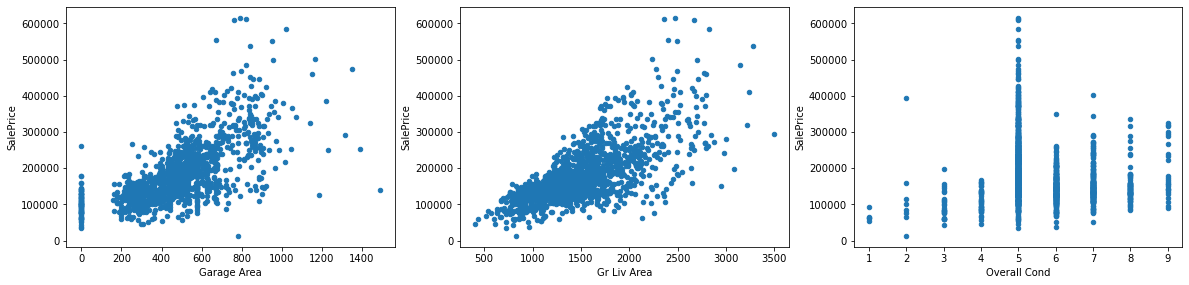

In [53]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)

train.plot(x='Garage Area' ,y='SalePrice' ,ax=ax1 ,kind='scatter')
train.plot(x='Gr Liv Area' ,y='SalePrice' ,ax=ax2 ,kind='scatter')
train.plot(x='Overall Cond' ,y='SalePrice' ,ax=ax3 ,kind='scatter')

plt.show()

In [54]:
#calcule de corrélation
#pandas.dataframe.corr()

train[['Garage Area','Gr Liv Area','Overall Cond','SalePrice']].corr()


,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


### Utilisation Skit_learn pour la regression linéaire simple:
    y= a0*x + a1

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']],train['SalePrice'])

print('a1=',lr.coef_)
print('a0=',lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

a1= [116.86624683]
a0= 5366.8217100561305


In [56]:
## faire la prédiction 
train_prediction = lr.predict(train[['Gr Liv Area']])
test_prediction = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_prediction,train['SalePrice'])
test_mse = mean_squared_error(test_prediction,test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('train_rmse:',train_rmse)
print('test_rmse:',test_rmse)

train_rmse: 56034.3620014128
test_rmse: 57088.251612639084


### Regression linéaire multiple :
    Y=A0 + A1*X + A2*X2 +.....+An*Xn

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr2 = LinearRegression()
lr2.fit(train[['Gr Liv Area','Overall Cond']],train['SalePrice'])

train_prediction2 = lr2.predict(train[['Gr Liv Area','Overall Cond']])
test_prediction2 = lr2.predict(test[['Gr Liv Area','Overall Cond']])

train_mse2 = mean_squared_error(train_prediction2,train['SalePrice'])
test_mse2 = mean_squared_error(test_prediction2,test['SalePrice'])

train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('train_rmse_2:',train_rmse2)
print('test_rmse_2:',test_rmse2)

train_rmse_2: 56032.398015258674
test_rmse_2: 57066.90779448559
